In [71]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt 
import requests
import time
from scipy.stats import linregress 



In [75]:
cars_file_path = r"/Users/rebelplanet/Desktop/ClassWork Data/Project 1/USA_cars_datasets.csv"
us_states_shapefile_path = gpd.datasets.get_path('naturalearth_lowres')

#read CSV file into Pandas DF
cars_df = pd.read_csv(cars_file_path)

#Display the DataFrame 
cars_df 



,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,2494,7800,nissan,versa,2019,clean vehicle,23609.0,red,3n1cn7ap9kl880319,167722715,california,usa,1 days left
2495,2495,9200,nissan,versa,2018,clean vehicle,34553.0,silver,3n1cn7ap5jl884088,167762225,florida,usa,21 hours left
2496,2496,9200,nissan,versa,2018,clean vehicle,31594.0,silver,3n1cn7ap9jl884191,167762226,florida,usa,21 hours left
2497,2497,9200,nissan,versa,2018,clean vehicle,32557.0,black,3n1cn7ap3jl883263,167762227,florida,usa,2 days left


In [10]:
# Drop null values
cars_df_clean = cars_df.dropna()
cars_df_clean.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [11]:
mean = cars_df_clean.groupby(["state"])["price"].mean()
mean 

state
alabama           23872.058824
arizona           14709.090909
arkansas           3771.666667
california        17836.710526
colorado          12676.190476
connecticut       14713.600000
florida           15075.630081
georgia           16050.313725
idaho             11500.000000
illinois          26715.707965
indiana           21391.428571
kansas            15500.000000
kentucky          44969.444444
louisiana         16181.181818
maryland            662.500000
massachusetts     17650.555556
michigan          23899.822485
minnesota         18207.352941
mississippi       21148.333333
missouri          16192.391304
montana            2825.000000
nebraska          21350.000000
nevada            23653.529412
new hampshire     16757.500000
new jersey        16209.712644
new mexico        27375.000000
new york          17850.706897
north carolina    16485.273973
ohio              17460.967742
oklahoma          19839.084507
ontario           30357.142857
oregon            13109.259259
pe

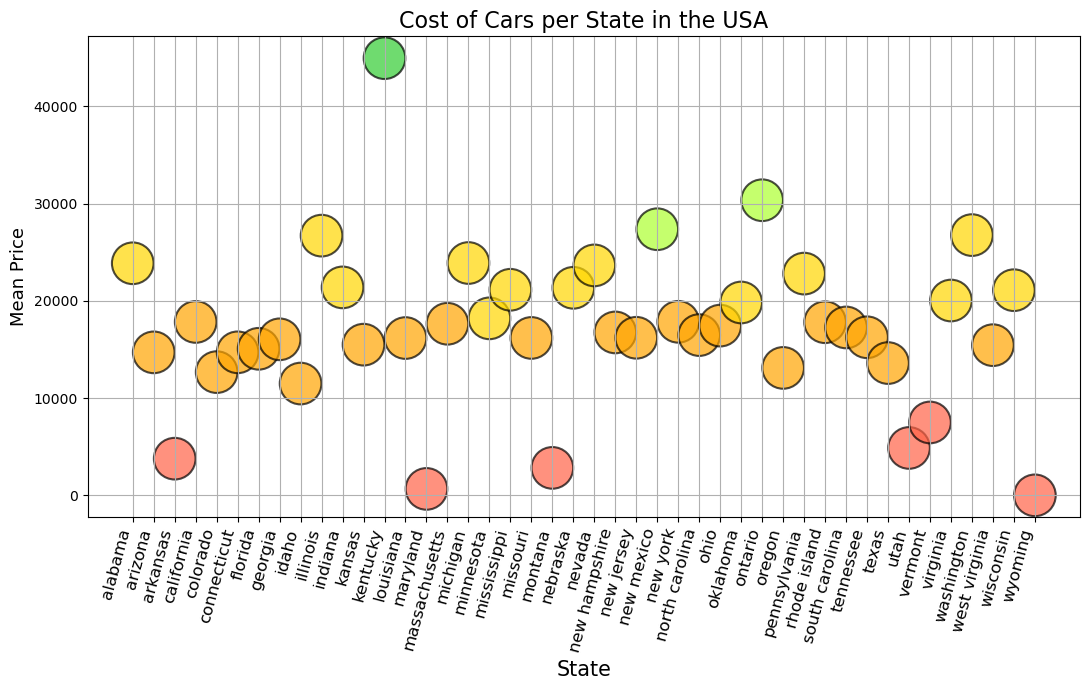

In [92]:
# Group by state and calculate the mean price of cars
mean_price_by_state = cars_df_clean.groupby("state")["price"].mean().reset_index()

# Define colors for the bubbles based on the mean price
colors = pd.cut(mean_price_by_state["price"], bins=5, labels=["#FF6347", "#FFA500", "#FFD700", "#ADFF2F", "#32CD32"])

# Plot the bubble graph
plt.figure(figsize=(11, 7))
plt.scatter(x=mean_price_by_state["state"], y=mean_price_by_state["price"], s=900, c=colors, alpha=0.7, edgecolors="k", linewidths=1.5)
plt.title("Cost of Cars per State in the USA", fontsize=16)
plt.xlabel("State", fontsize=15)
plt.ylabel("Mean Price", fontsize=13)
plt.xticks(rotation=75, ha="right", fontsize=12)
plt.yticks(fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()